# Ciência de Dados - Lista 2

Aluno: Nilson Sales de Carvalho




#### 6. Usando  técnicas  de  Visualização  de  Dados,  construa  um  gráfico  a  partir  dos seguintes dados: (1 ponto)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

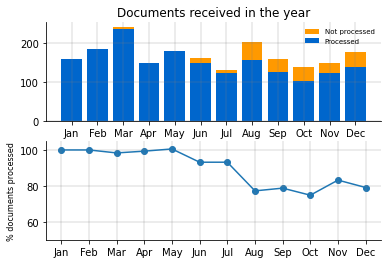

In [ ]:
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months = range(1,13)

received = np.array([160, 184, 241, 149, 180, 161, 132, 202, 160, 139, 149, 177])
processed = np.array([160, 184, 237, 148, 181, 150, 123, 156, 126, 104, 124, 140])

process_rate = (processed/received)*100.0


ax = plt.subplot(2,1,1)
plt.title("Documents received in the year")
plt.bar(months, received, color='#ff9900')
plt.bar(months, processed, color='#0066cc')
plt.legend(["Not processed", "Processed"], fontsize='x-small', frameon=False)
plt.xticks(months, month_names)
plt.grid(color='gray', linestyle='-', linewidth=0.3)
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


ax1 = plt.subplot(2,1,2)
plt.plot(months, process_rate)
plt.scatter(months, process_rate)
plt.ylim(50,105)
plt.ylabel("% documents processed", size='8')
plt.xticks(months, month_names)
plt.grid(color='gray', linestyle='-', linewidth=0.3)
# Hide the right and top spines
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


plt.show()



#### 7. Usando os dados a seguir e um classificador, a qual classe o texto “what do you mean” deveria ser classificado? (2 pontos)


In [ ]:
text = ['They are novels',
        'have you read this book',
        'who is the author',
        'what are the characters',
        'This is how I bought the book',
        'I like fictions',
        'what is your favourite book',
        'This is my book']

my_class = np.array(['stmt', 'question', 'question', 'question', 'stmt', 'stmt', 'question', 'stmt'])

# use ids for classes
class_id = (my_class == 'question').astype('int') # 0 for 'stmt' and 1 for 'question'

class_id

array([0, 1, 1, 1, 0, 0, 1, 0])

In [ ]:
for i, word in enumerate(text):
  # lowercase all words
  text[i] = word.lower()

text

['they are novels',
 'have you read this book',
 'who is the author',
 'what are the characters',
 'this is how i bought the book',
 'i like fictions',
 'what is your favourite book',
 'this is my book']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorize tokens
# Create a dictionary with the word frequencies
count_vec = CountVectorizer()
vect = count_vec.fit(text)

# Vectorize tokens to a sparse matrix
X_vec = vect.transform(text)

X_vec.shape

(8, 21)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# create classifier
bayes = MultinomialNB()

# train using all the data
bayes = bayes.fit(X_vec, class_id)

# transform and classify new text
new_text = ['what do you mean']
new_vec = count_vec.transform(new_text)

predicted = bayes.predict(new_vec)

if predicted[0] == 1:
  print('question')
else:
  print('stmt')

question



#### 8. Usando os dados temporais, disponível no link a seguir, sobre vendas de medicamentos na Austrália, que tipo de conclusões podemos obter? (2 pontos)

https://github.com/bapimentel/Ciencia-de-Dados/blob/master/Dados/Drugs.csv

In [ ]:
import pandas as pd

# load and read the data
data = pd.read_csv('https://raw.githubusercontent.com/bapimentel/Ciencia-de-Dados/master/Dados/Drugs.csv')

data.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


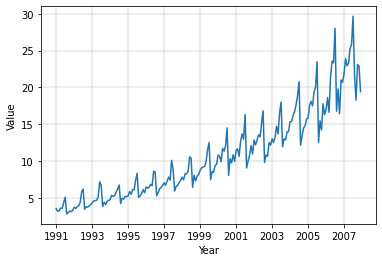

In [ ]:
# generate xticks for odd years
date_to_plot = '-07-01'
years = []
for year in range(1991,2009,2):
  years.append(str(year)+date_to_plot)


plt.plot(data['date'], data['value'])
plt.xlabel('Year')
plt.ylabel('Value')
plt.xticks(years, range(1991,2009,2))
plt.grid(color='gray', linestyle='-', linewidth=0.3)

plt.show()

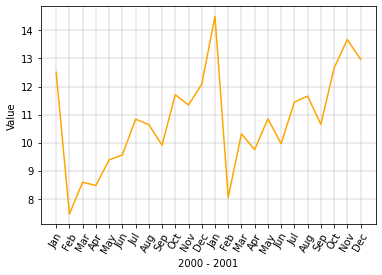

In [ ]:
# Taking a closer look at 2000 and 2001
year_2000_01 = data[ (data['date'] >= '2000-01-01') & (data['date'] <= '2001-12-31') ]


# generate xticks
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


plt.plot(year_2000_01['date'], year_2000_01['value'], color='orange')
plt.xlabel('2000 - 2001')
plt.ylabel('Value')
plt.xticks(year_2000_01['date'], month_names*2, rotation=60)
plt.grid(color='gray', linestyle='-', linewidth=0.3)

plt.show()